Introduction:
=============

This notebook is designed to guide you through the basics and get you exploring data using python with Pandas

Pandas:
------

Pandas is a great library for loading and interacting with relational data.

Let's start by importing pandas...

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
identity = pd.DataFrame([[1,0,0],[0,1,0],[0,0,1]])
identity

,0,1,2
0,1,0,0
1,0,1,0
2,0,0,1


Loading data:
------------

Loading data into a data frame can be done using several helper methods. One particularily helpful one is `read_csv`

In [4]:
df = pd.read_csv("Salaries.csv")
df.head()

C:\Anaconda3\envs\seng5199\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


Describing the data:
-------------------

Here are some basic ways to examine the data

In [5]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [6]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [7]:
df.shape

(148654, 13)

Cleaning:
--------

Convert non-numeric datum to numbers

In [8]:
numeric_columns = ["BasePay", "OvertimePay", "OtherPay", "Benefits"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

Get rid of useless datapoints

In [9]:
df = df.drop(["Notes", "Id", "Agency"], 1)

Reduce the number of different titles

In [10]:
df["JobTitle"] = df["JobTitle"].str.upper()
df["EmployeeName"] = df["EmployeeName"].str.upper()

Replace NaN with a default value

In [11]:
df["Benefits"] = df["Benefits"].fillna(0.0)
df["BasePay"] = df["BasePay"].fillna(0.0)

Slicing and Dicing:
------------------

One of the most insightful ways to start data analysis is by exploring. Slicing helps us come to understand our data by cutting it down into smaller chunks.

Slicing can be done a number of ways, like by selecting columns by their label...

In [12]:
df["JobTitle"].head()

0    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                   CAPTAIN III (POLICE DEPARTMENT)
2                   CAPTAIN III (POLICE DEPARTMENT)
3              WIRE ROPE CABLE MAINTENANCE MECHANIC
4      DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
Name: JobTitle, dtype: object

or by selecting a list of labels.

In [13]:
df[["JobTitle","BasePay"]].head()

,JobTitle,BasePay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18
1,CAPTAIN III (POLICE DEPARTMENT),155966.02
2,CAPTAIN III (POLICE DEPARTMENT),212739.13
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60


By using the `iloc` property we can slice using integer ranges for rows and columns.

In [14]:
df.iloc[0:3,2:4]

,BasePay,OvertimePay
0,167411.18,0.00
1,155966.02,245131.88
2,212739.13,106088.18


We can also combine the two methods for more complicated slices.

In [15]:
df[["JobTitle", "BasePay"]].iloc[50:60]

,JobTitle,BasePay
50,"BATTALION CHIEF, (FIRE DEPARTMENT)",168692.59
51,DEPARTMENT HEAD V,246305.62
52,"CAPTAIN, FIRE SUPPRESSION",140546.87
53,"CAPTAIN, FIRE SUPPRESSION",140546.88
54,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140546.89
55,DEPUTY CHIEF III (POLICE DEPARTMENT),226206.80
56,DEPARTMENT HEAD V,240731.93
57,ASSISTANT DEPUTY CHIEF II,217410.80
58,INCIDENT SUPPORT SPECIALIST,115381.02
59,ANESTHETIST,214745.44


Filtering:
---------

Filtering is another great way to select subsets of the data.

Filtering can be done by indexing using an expression.

In [16]:
df[df["BasePay"] > 100000].head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,NaN
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,NaN
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,NaN
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,NaN
5,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,0.0,316285.74,316285.74,2011,NaN


This is simply indexing by an array of booleans

In [17]:
df["Status"].notnull().head()

0    False
1    False
2    False
3    False
4    False
Name: Status, dtype: bool

In [18]:
df[df["Status"].notnull()].head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
110531,DAVID SHINN,DEPUTY CHIEF 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,PT
110532,AMY P HART,ASST MED EXAMINER,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,FT
110533,WILLIAM J COAKER JR.,CHIEF INVESTMENT OFFICER,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,PT
110534,GREGORY P SUHR,CHIEF OF POLICE,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,FT
110535,JOANNE M HAYES-WHITE,"CHIEF, FIRE DEPARTMENT",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,FT


We can even index using multiple filters

In [19]:
df[(df["JobTitle"] == "CHIEF OF POLICE") & (df["Year"] >= 2013)]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
72925,GREGORY P SUHR,CHIEF OF POLICE,319275.01,0.0,20007.06,86533.21,339282.07,425815.28,2013,NaN
110534,GREGORY P SUHR,CHIEF OF POLICE,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,2014,FT


Aggregation:
------------

Aggregations are yet another way to make sense of your data by condensing it into several key statistics.

For example, we can count unique values...

In [20]:
df["JobTitle"].unique().size

1637

or take the average...

In [21]:
df["BasePay"].mean()

66053.729288078364

or use get the quartiles...

In [22]:
df["BasePay"].describe()

count    148654.000000
mean      66053.729288
std       42886.711158
min        -166.010000
25%       32792.545000
50%       64861.600000
75%       94605.740000
max      319275.010000
Name: BasePay, dtype: float64

Grouping:
--------

We can group values columns and then aggregate those

In [23]:
df[["OtherPay","Year"]].groupby("Year").aggregate("mean")

,OtherPay
Year,
2011,3617.081926
2012,3653.437583
2013,3819.969007
2014,3505.421251


Plotting:
---------

Let's plot salaries and benefits

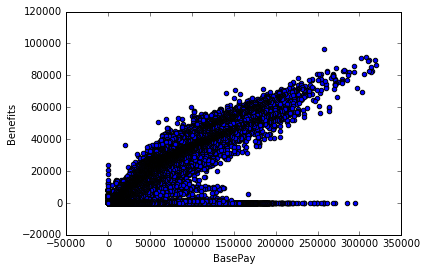

In [24]:
df.plot.scatter(x="BasePay", y="Benefits")

Modeling:
---------

Let's do a linear regression

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

mask = np.random.rand(len(df)) < 0.8

train = df[mask]
test = df[~mask]

x = train[["BasePay"]].as_matrix()
y = train["Benefits"].as_matrix()

model = LinearRegression().fit(x,y)

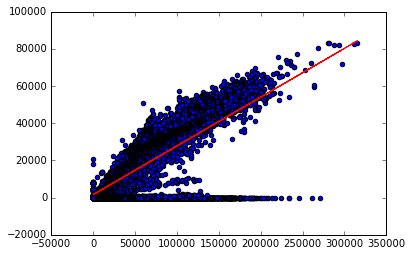

In [26]:
import matplotlib.pyplot as plt

plt.scatter(test[["BasePay"]], test["Benefits"])
plt.plot(test[["BasePay"]], model.predict(test[["BasePay"]]), color="red")

Exercises:
======

1. Who has the largest total pay?
1. Who has the smallest total pay?
1. What is the average of total salary by year?
1. What is the difference between the average salary of full-time vs part-time employees?
1. How many unique people are there in the data set?

Bonus:
1. How much is the 90th percentile total salary? Hint: use the cumsum method and divide by the max of the cumulative sum

In [27]:
df.sort_values(by="TotalPay", ascending=False)[:5]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,NaN
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,NaN
110531,DAVID SHINN,DEPUTY CHIEF 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,PT
110532,AMY P HART,ASST MED EXAMINER,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,FT
36159,GARY ALTENBERG,"LIEUTENANT, FIRE SUPPRESSION",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,NaN
